In [92]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [121]:
# 2330
df = pd.read_csv('2330.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,36.650322,2.006623e+11
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,37.473900,4.024668e+11
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,36.650322,1.975457e+11
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,35.620773,2.352703e+11
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,36.856174,2.761717e+11
...,...,...,...,...,...,...,...
5263,2021-01-05,536.000000,542.000000,535.000000,542.000000,542.000000,3.441187e+07
5264,2021-01-06,555.000000,555.000000,541.000000,549.000000,549.000000,5.303055e+07
5265,2021-01-07,554.000000,570.000000,553.000000,565.000000,565.000000,5.116678e+07
5266,2021-01-08,580.000000,580.000000,571.000000,580.000000,580.000000,5.956356e+07


In [122]:
n = 20

In [123]:
df = df.loc[df['Date'] > '2020-10-01']
len(df)

69

In [124]:
df['Volume'].fillna(0).astype('int')

5199    32945832
5200    35775395
5201    42926239
5202    60853811
5203    64719223
          ...   
5263    34411866
5264    53030554
5265    51166782
5266    59563555
5267    48810990
Name: Volume, Length: 69, dtype: int64

In [125]:
df['Volume'].fillna(0).astype('int').apply(lambda x: x/1000)

5199    32945.832
5200    35775.395
5201    42926.239
5202    60853.811
5203    64719.223
          ...    
5263    34411.866
5264    53030.554
5265    51166.782
5266    59563.555
5267    48810.990
Name: Volume, Length: 69, dtype: float64

In [126]:
df['Date'] = pd.to_datetime(df['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 5199 to 5267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       69 non-null     datetime64[ns]
 1   Open       69 non-null     float64       
 2   High       69 non-null     float64       
 3   Low        69 non-null     float64       
 4   Close      69 non-null     float64       
 5   Adj Close  69 non-null     float64       
 6   Volume     69 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 4.3 KB


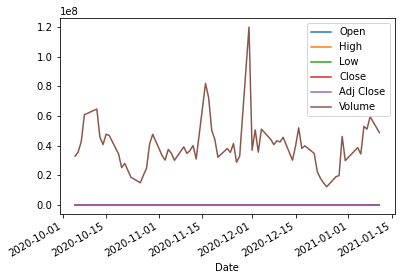

In [128]:
df.plot(x='Date')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

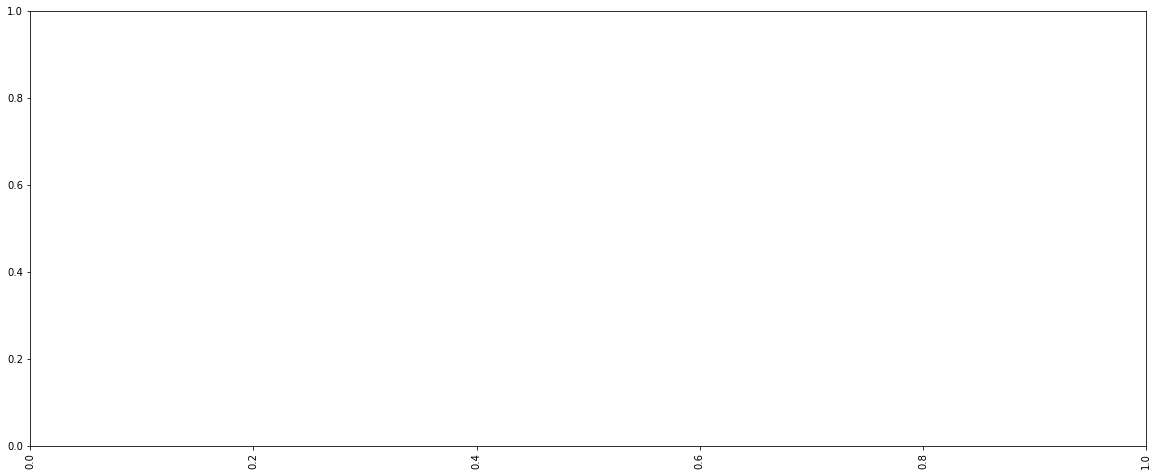

In [129]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


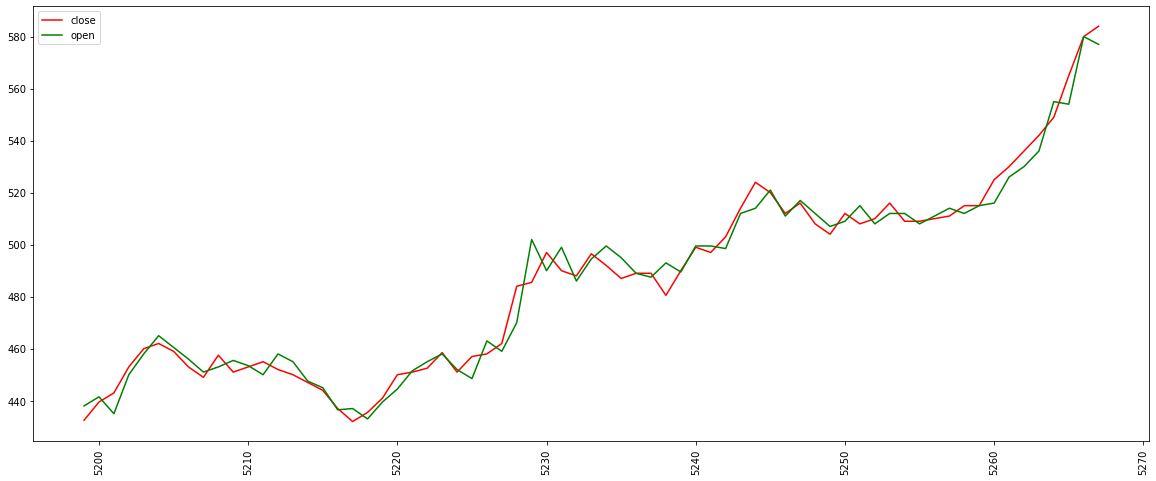

In [130]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(df['Close'], color='red', label='close')
ax1.plot(df['Open'], color='green', label='open')
plt.legend()
#ax2 = ax1.twinx()
#plt.bar(df['Date'], df['Volume'].fillna(0).astype('int')//100000)
#ax3 = ax1.twinx()
plt.show()

In [131]:
total_cnt = len(df)
test_cnt = int(total_cnt*0.3)
test_cnt

20

In [132]:
#test_data = df.loc[df['Date'] > '2020-10-01']
test_data = df[0:test_cnt]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
5199,2020-10-05,438.0,438.0,431.5,432.5,430.388184,32945832.0
5200,2020-10-06,441.5,442.0,437.5,439.5,437.354004,35775395.0
5201,2020-10-07,435.0,445.0,435.0,443.0,440.836914,42926239.0
5202,2020-10-08,450.0,454.0,448.5,453.0,450.788086,60853811.0
5203,2020-10-12,458.0,462.0,457.5,460.0,457.753906,64719223.0
5204,2020-10-13,465.0,465.0,456.5,462.0,459.744141,45750738.0
5205,2020-10-14,460.5,461.0,457.0,459.0,456.758789,40809241.0
5206,2020-10-15,456.0,456.5,450.0,453.0,450.788086,47775028.0
5207,2020-10-16,451.0,456.0,448.5,449.0,446.807617,46876801.0
5208,2020-10-19,453.0,457.5,451.0,457.5,455.266113,34470906.0


In [133]:
train_data = df[:len(df)-len(test_data)]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
5199,2020-10-05,438.0,438.0,431.5,432.5,430.388184,32945832.0
5200,2020-10-06,441.5,442.0,437.5,439.5,437.354004,35775395.0
5201,2020-10-07,435.0,445.0,435.0,443.0,440.836914,42926239.0
5202,2020-10-08,450.0,454.0,448.5,453.0,450.788086,60853811.0
5203,2020-10-12,458.0,462.0,457.5,460.0,457.753906,64719223.0
5204,2020-10-13,465.0,465.0,456.5,462.0,459.744141,45750738.0
5205,2020-10-14,460.5,461.0,457.0,459.0,456.758789,40809241.0
5206,2020-10-15,456.0,456.5,450.0,453.0,450.788086,47775028.0
5207,2020-10-16,451.0,456.0,448.5,449.0,446.807617,46876801.0
5208,2020-10-19,453.0,457.5,451.0,457.5,455.266113,34470906.0


In [134]:
test_set = test_data['Open']
test_set

5199    438.0
5200    441.5
5201    435.0
5202    450.0
5203    458.0
5204    465.0
5205    460.5
5206    456.0
5207    451.0
5208    453.0
5209    455.5
5210    453.5
5211    450.0
5212    458.0
5213    455.0
5214    447.5
5215    445.0
5216    436.5
5217    437.0
5218    433.0
Name: Open, dtype: float64

In [135]:
train_set = train_data['Open']
train_set

5199    438.0
5200    441.5
5201    435.0
5202    450.0
5203    458.0
5204    465.0
5205    460.5
5206    456.0
5207    451.0
5208    453.0
5209    455.5
5210    453.5
5211    450.0
5212    458.0
5213    455.0
5214    447.5
5215    445.0
5216    436.5
5217    437.0
5218    433.0
5219    439.5
5220    444.5
5221    451.5
5222    455.0
5223    458.0
5224    452.0
5225    448.5
5226    463.0
5227    459.0
5228    470.0
5229    502.0
5230    490.0
5231    499.0
5232    486.0
5233    494.5
5234    499.5
5235    495.0
5236    489.0
5237    487.5
5238    493.0
5239    489.5
5240    499.5
5241    499.5
5242    498.5
5243    512.0
5244    514.0
5245    521.0
5246    511.0
5247    517.0
Name: Open, dtype: float64

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
sc = MinMaxScaler(feature_range=(0,1))

In [138]:
train_set = train_set.values.reshape(-1,1)
train_set

array([[438. ],
       [441.5],
       [435. ],
       [450. ],
       [458. ],
       [465. ],
       [460.5],
       [456. ],
       [451. ],
       [453. ],
       [455.5],
       [453.5],
       [450. ],
       [458. ],
       [455. ],
       [447.5],
       [445. ],
       [436.5],
       [437. ],
       [433. ],
       [439.5],
       [444.5],
       [451.5],
       [455. ],
       [458. ],
       [452. ],
       [448.5],
       [463. ],
       [459. ],
       [470. ],
       [502. ],
       [490. ],
       [499. ],
       [486. ],
       [494.5],
       [499.5],
       [495. ],
       [489. ],
       [487.5],
       [493. ],
       [489.5],
       [499.5],
       [499.5],
       [498.5],
       [512. ],
       [514. ],
       [521. ],
       [511. ],
       [517. ]])

In [139]:
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.05681818],
       [0.09659091],
       [0.02272727],
       [0.19318182],
       [0.28409091],
       [0.36363636],
       [0.3125    ],
       [0.26136364],
       [0.20454545],
       [0.22727273],
       [0.25568182],
       [0.23295455],
       [0.19318182],
       [0.28409091],
       [0.25      ],
       [0.16477273],
       [0.13636364],
       [0.03977273],
       [0.04545455],
       [0.        ],
       [0.07386364],
       [0.13068182],
       [0.21022727],
       [0.25      ],
       [0.28409091],
       [0.21590909],
       [0.17613636],
       [0.34090909],
       [0.29545455],
       [0.42045455],
       [0.78409091],
       [0.64772727],
       [0.75      ],
       [0.60227273],
       [0.69886364],
       [0.75568182],
       [0.70454545],
       [0.63636364],
       [0.61931818],
       [0.68181818],
       [0.64204545],
       [0.75568182],
       [0.75568182],
       [0.74431818],
       [0.89772727],
       [0.92045455],
       [1.        ],
       [0.886

In [140]:
x_train = []
y_train = []

In [141]:
for i in range(n, len(train_set)):
    x_train.append(train_set_sc[i-n:i-1, 0])
    y_train.append(train_set_sc[i,0])

In [142]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [143]:
x_train

array([[0.05681818, 0.09659091, 0.02272727, 0.19318182, 0.28409091,
        0.36363636, 0.3125    , 0.26136364, 0.20454545, 0.22727273,
        0.25568182, 0.23295455, 0.19318182, 0.28409091, 0.25      ,
        0.16477273, 0.13636364, 0.03977273, 0.04545455],
       [0.09659091, 0.02272727, 0.19318182, 0.28409091, 0.36363636,
        0.3125    , 0.26136364, 0.20454545, 0.22727273, 0.25568182,
        0.23295455, 0.19318182, 0.28409091, 0.25      , 0.16477273,
        0.13636364, 0.03977273, 0.04545455, 0.        ],
       [0.02272727, 0.19318182, 0.28409091, 0.36363636, 0.3125    ,
        0.26136364, 0.20454545, 0.22727273, 0.25568182, 0.23295455,
        0.19318182, 0.28409091, 0.25      , 0.16477273, 0.13636364,
        0.03977273, 0.04545455, 0.        , 0.07386364],
       [0.19318182, 0.28409091, 0.36363636, 0.3125    , 0.26136364,
        0.20454545, 0.22727273, 0.25568182, 0.23295455, 0.19318182,
        0.28409091, 0.25      , 0.16477273, 0.13636364, 0.03977273,
        0.045

In [144]:
y_train

array([0.07386364, 0.13068182, 0.21022727, 0.25      , 0.28409091,
       0.21590909, 0.17613636, 0.34090909, 0.29545455, 0.42045455,
       0.78409091, 0.64772727, 0.75      , 0.60227273, 0.69886364,
       0.75568182, 0.70454545, 0.63636364, 0.61931818, 0.68181818,
       0.64204545, 0.75568182, 0.75568182, 0.74431818, 0.89772727,
       0.92045455, 1.        , 0.88636364, 0.95454545])

In [145]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.05681818],
        [0.09659091],
        [0.02272727],
        [0.19318182],
        [0.28409091],
        [0.36363636],
        [0.3125    ],
        [0.26136364],
        [0.20454545],
        [0.22727273],
        [0.25568182],
        [0.23295455],
        [0.19318182],
        [0.28409091],
        [0.25      ],
        [0.16477273],
        [0.13636364],
        [0.03977273],
        [0.04545455]],

       [[0.09659091],
        [0.02272727],
        [0.19318182],
        [0.28409091],
        [0.36363636],
        [0.3125    ],
        [0.26136364],
        [0.20454545],
        [0.22727273],
        [0.25568182],
        [0.23295455],
        [0.19318182],
        [0.28409091],
        [0.25      ],
        [0.16477273],
        [0.13636364],
        [0.03977273],
        [0.04545455],
        [0.        ]],

       [[0.02272727],
        [0.19318182],
        [0.28409091],
        [0.36363636],
        [0.3125    ],
        [0.26136364],
        [0.20454545],
      

In [146]:
x_train[0]

array([[0.05681818],
       [0.09659091],
       [0.02272727],
       [0.19318182],
       [0.28409091],
       [0.36363636],
       [0.3125    ],
       [0.26136364],
       [0.20454545],
       [0.22727273],
       [0.25568182],
       [0.23295455],
       [0.19318182],
       [0.28409091],
       [0.25      ],
       [0.16477273],
       [0.13636364],
       [0.03977273],
       [0.04545455]])

In [147]:
y_train[0]

0.0738636363636358

### modeling

In [148]:
import tensorflow as tf

In [149]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=100, input_shape=(x_train.shape[1], 1) ) )

In [150]:
model.add(tf.keras.layers.Dense(units=1))

In [151]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [152]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [153]:
mymodel = model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
2/2 [==============================] - 2s 15ms/step - loss: 0.4508
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 0.3297
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2000
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1046
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0540
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0309
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0579
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0500
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0286
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 11/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0287
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 13/100
2/2 [==============================]

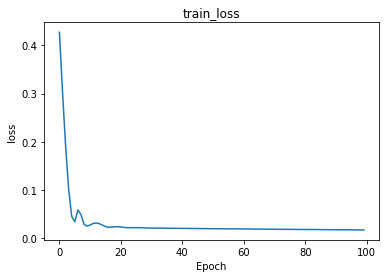

In [154]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(mymodel.history['loss'])

In [155]:
mymodel.history

{'loss': [0.4273347556591034,
  0.3045223355293274,
  0.19287629425525665,
  0.10219042748212814,
  0.04515096917748451,
  0.03402605652809143,
  0.05866944044828415,
  0.04904234781861305,
  0.02889135293662548,
  0.025039495900273323,
  0.027423206716775894,
  0.030670790001749992,
  0.03154100477695465,
  0.030140554532408714,
  0.027150869369506836,
  0.024125533178448677,
  0.022615762427449226,
  0.023136600852012634,
  0.023694079369306564,
  0.023949777707457542,
  0.023411115631461143,
  0.02249588817358017,
  0.02183462493121624,
  0.021920761093497276,
  0.021810930222272873,
  0.021860208362340927,
  0.02180987410247326,
  0.02170409820973873,
  0.021286876872181892,
  0.021204225718975067,
  0.021028300747275352,
  0.020988915115594864,
  0.020930064842104912,
  0.02094240114092827,
  0.02080528810620308,
  0.02070593647658825,
  0.02061651088297367,
  0.02060874179005623,
  0.02055366523563862,
  0.020444557070732117,
  0.020370377227663994,
  0.020352289080619812,
  0.02

In [156]:
total_data_set = pd.concat((train_data['Open'], test_data['Open']), axis=0)
total_data_set

5199    438.0
5200    441.5
5201    435.0
5202    450.0
5203    458.0
        ...  
5214    447.5
5215    445.0
5216    436.5
5217    437.0
5218    433.0
Name: Open, Length: 69, dtype: float64

In [157]:
inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values
inputs

array([493. , 489.5, 499.5, 499.5, 498.5, 512. , 514. , 521. , 511. ,
       517. , 438. , 441.5, 435. , 450. , 458. , 465. , 460.5, 456. ,
       451. , 453. , 455.5, 453.5, 450. , 458. , 455. , 447.5, 445. ,
       436.5, 437. , 433. ])

In [158]:
inputs = inputs.reshape(-1,1)
inputs

array([[493. ],
       [489.5],
       [499.5],
       [499.5],
       [498.5],
       [512. ],
       [514. ],
       [521. ],
       [511. ],
       [517. ],
       [438. ],
       [441.5],
       [435. ],
       [450. ],
       [458. ],
       [465. ],
       [460.5],
       [456. ],
       [451. ],
       [453. ],
       [455.5],
       [453.5],
       [450. ],
       [458. ],
       [455. ],
       [447.5],
       [445. ],
       [436.5],
       [437. ],
       [433. ]])

In [159]:
inputs = sc.transform(inputs)
inputs

array([[0.68181818],
       [0.64204545],
       [0.75568182],
       [0.75568182],
       [0.74431818],
       [0.89772727],
       [0.92045455],
       [1.        ],
       [0.88636364],
       [0.95454545],
       [0.05681818],
       [0.09659091],
       [0.02272727],
       [0.19318182],
       [0.28409091],
       [0.36363636],
       [0.3125    ],
       [0.26136364],
       [0.20454545],
       [0.22727273],
       [0.25568182],
       [0.23295455],
       [0.19318182],
       [0.28409091],
       [0.25      ],
       [0.16477273],
       [0.13636364],
       [0.03977273],
       [0.04545455],
       [0.        ]])

In [160]:
x_test = []
for i in range(10, len(inputs)):
    x_test.append(inputs[i-10:i-1, 0])
x_test = np.array(x_test)
x_test

array([[0.68181818, 0.64204545, 0.75568182, 0.75568182, 0.74431818,
        0.89772727, 0.92045455, 1.        , 0.88636364],
       [0.64204545, 0.75568182, 0.75568182, 0.74431818, 0.89772727,
        0.92045455, 1.        , 0.88636364, 0.95454545],
       [0.75568182, 0.75568182, 0.74431818, 0.89772727, 0.92045455,
        1.        , 0.88636364, 0.95454545, 0.05681818],
       [0.75568182, 0.74431818, 0.89772727, 0.92045455, 1.        ,
        0.88636364, 0.95454545, 0.05681818, 0.09659091],
       [0.74431818, 0.89772727, 0.92045455, 1.        , 0.88636364,
        0.95454545, 0.05681818, 0.09659091, 0.02272727],
       [0.89772727, 0.92045455, 1.        , 0.88636364, 0.95454545,
        0.05681818, 0.09659091, 0.02272727, 0.19318182],
       [0.92045455, 1.        , 0.88636364, 0.95454545, 0.05681818,
        0.09659091, 0.02272727, 0.19318182, 0.28409091],
       [1.        , 0.88636364, 0.95454545, 0.05681818, 0.09659091,
        0.02272727, 0.19318182, 0.28409091, 0.36363636],


In [161]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.68181818],
        [0.64204545],
        [0.75568182],
        [0.75568182],
        [0.74431818],
        [0.89772727],
        [0.92045455],
        [1.        ],
        [0.88636364]],

       [[0.64204545],
        [0.75568182],
        [0.75568182],
        [0.74431818],
        [0.89772727],
        [0.92045455],
        [1.        ],
        [0.88636364],
        [0.95454545]],

       [[0.75568182],
        [0.75568182],
        [0.74431818],
        [0.89772727],
        [0.92045455],
        [1.        ],
        [0.88636364],
        [0.95454545],
        [0.05681818]],

       [[0.75568182],
        [0.74431818],
        [0.89772727],
        [0.92045455],
        [1.        ],
        [0.88636364],
        [0.95454545],
        [0.05681818],
        [0.09659091]],

       [[0.74431818],
        [0.89772727],
        [0.92045455],
        [1.        ],
        [0.88636364],
        [0.95454545],
        [0.05681818],
        [0.09659091],
        [0.02272727]],



In [162]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

array([[0.9253212 ],
       [0.94854236],
       [0.8509399 ],
       [0.72037023],
       [0.58180463],
       [0.47949523],
       [0.41932407],
       [0.40005663],
       [0.398099  ],
       [0.40019527],
       [0.39567178],
       [0.3953972 ],
       [0.39441645],
       [0.39133582],
       [0.38171577],
       [0.38173068],
       [0.38285547],
       [0.3749591 ],
       [0.35995355],
       [0.33187544]], dtype=float32)

In [163]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[514.4282 ],
       [516.47174],
       [507.8827 ],
       [496.39258],
       [484.19882],
       [475.19556],
       [469.9005 ],
       [468.205  ],
       [468.0327 ],
       [468.21716],
       [467.81912],
       [467.79495],
       [467.70862],
       [467.43756],
       [466.59097],
       [466.5923 ],
       [466.69128],
       [465.9964 ],
       [464.6759 ],
       [462.20502]], dtype=float32)

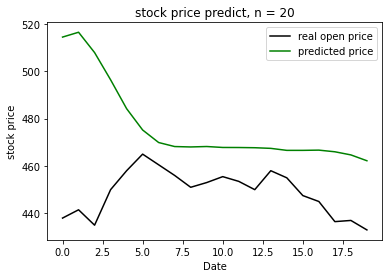

In [164]:
plt.plot(test_data['Open'].values, color='black', label = "real open price")
plt.plot(predicted_stock_price, color='green', label = "predicted price")
plt.title('stock price predict, n = {}'.format(n))
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()